In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor

In [61]:
data = load_diabetes()
X, y = data.data, data.target

In [62]:
df = pd.DataFrame(data=np.c_[X, y], columns=data.feature_names + ['target'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [12]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-5.023634e-19,1.205672e-17,-2.250588e-16,-4.822688e-17,-1.431736e-17,3.943552e-17,-6.028360e-18,-8.540177e-18,9.318840e-17,1.155436e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
simple_linear_model = LinearRegression()
simple_linear_model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_train_pred_slr = simple_linear_model.predict(X_train)
y_test_pred_slr = simple_linear_model.predict(X_test)

In [58]:
slr_r2_train = r2_score(y_train, y_train_pred_slr)
slr_r2_test = r2_score(y_test, y_test_pred_slr)

slr_mse_train = mean_squared_error(y_train, y_train_pred_slr)
slr_mse_test = mean_squared_error(y_test, y_test_pred_slr)

slr_rmse_train = mean_squared_error(y_train, y_train_pred_slr, squared=False)
slr_rmse_test = mean_squared_error(y_test, y_test_pred_slr, squared=False)

slr_mae_train = mean_absolute_error(y_train, y_train_pred_slr)
slr_mae_test = mean_absolute_error(y_test, y_test_pred_slr)

print(f"Multiple Linear Regression:")
print(f"Training R-squared: {slr_r2_train:.4f}, Training MSE: {slr_mse_train:.4f}, Training RMSE: {slr_rmse_train:.4f}, Training MAE: {slr_mae_train:.4f}")
print(f"Testing R-squared: {slr_r2_test:.4f}, Testing MSE: {slr_mse_test:.4f}, Testing RMSE: {slr_rmse_test:.4f}, Training MAE: {slr_mae_test:.4f}")

Multiple Linear Regression:
Training R-squared: 0.5279, Training MSE: 2868.5497, Training RMSE: 53.5588, Training MAE: 43.4835
Testing R-squared: 0.4526, Testing MSE: 2900.1936, Testing RMSE: 53.8534, Training MAE: 42.7941


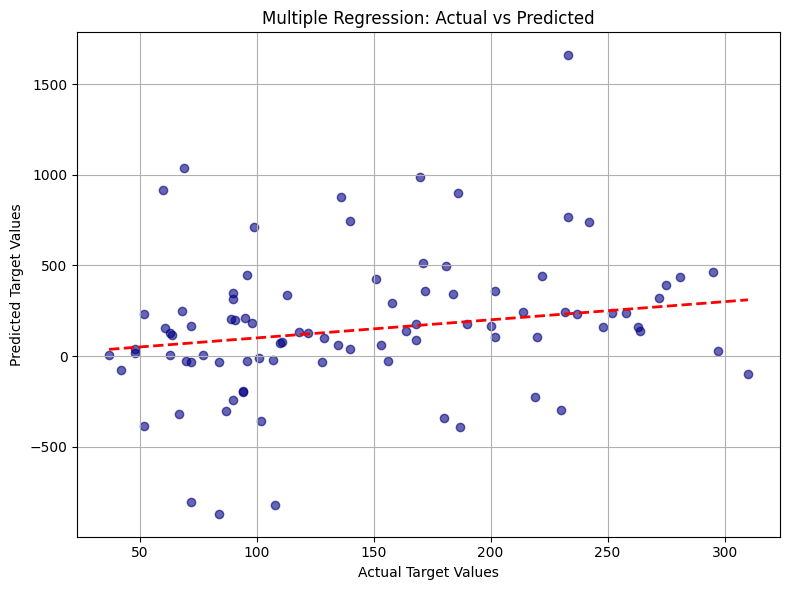

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='navy', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Multiple Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

## Linear Regression

In [52]:
X = data.data[:, [2]]  # Select only one column (shape: [n_samples, 1])
y = data.target

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred = model.predict(X_test)
print(f"R² Score (Simple): {r2_score(y_test, y_pred):.4f}")
print(f"MAE Score (Simple): {mean_absolute_error(y_test, y_pred):.4f}")
print(f"MSE Score (Simple): {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE Score (Simple): {mean_squared_error(y_test, y_pred, squared=False):.4f}")

R² Score (Simple): 0.2334
MAE Score (Simple): 52.2600
MSE Score (Simple): 4061.8259
RMSE Score (Simple): 63.7325


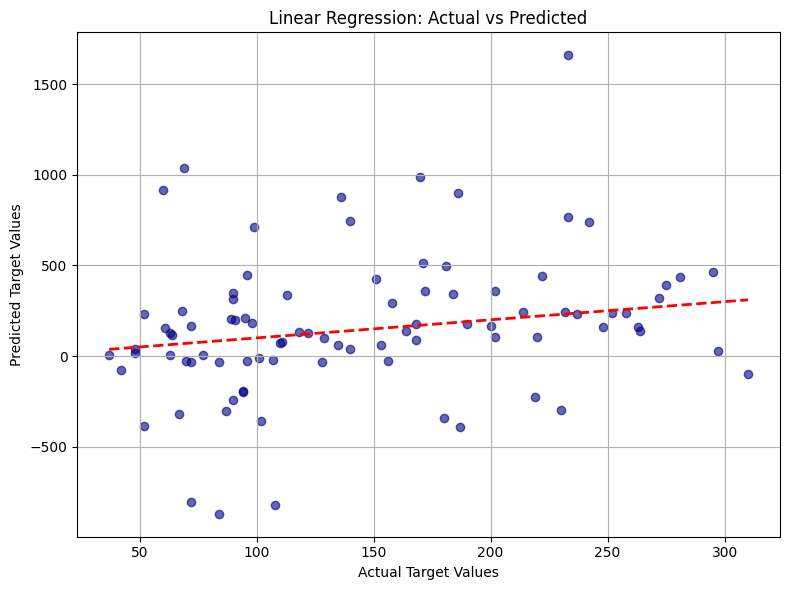

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='navy', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

## Polynomial Regression

In [18]:
degrees = [ 3, 4, 5]

In [22]:
polynomial_models = []
polynomial_r2_train_scores = []
polynomial_mae_train_scores = []
polynomial_mse_train_scores = []
polynomial_rmse_train_scores = []

polynomial_r2_test_scores = []
polynomial_mae_test_scores = []
polynomial_mse_test_scores = []
polynomial_rmse_test_scores = []



In [23]:
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    polynomial_models.append(model)
    
    # Make predictions on training and testing data
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    polynomial_r2_train = r2_score(y_train, y_train_pred)
    polynomial_r2_test = r2_score(y_test, y_test_pred)
    
    polynomial_r2_train_scores.append(polynomial_r2_train)
    polynomial_r2_test_scores.append(polynomial_r2_test)

    # MAE Score
    polynomial_mae_train_scores.append(mean_absolute_error(y_train, y_train_pred))
    polynomial_mae_test_scores.append(mean_absolute_error(y_test, y_test_pred))

    #MSE Score
    polynomial_mse_train_scores.append(mean_squared_error(y_train, y_train_pred))
    polynomial_mse_test_scores.append(mean_squared_error(y_test, y_test_pred))

    #RMSE Score
    polynomial_rmse_train_scores.append(mean_squared_error(y_train, y_train_pred, squared=False))
    polynomial_rmse_test_scores.append(mean_squared_error(y_test, y_test_pred, squared=False))
    

    

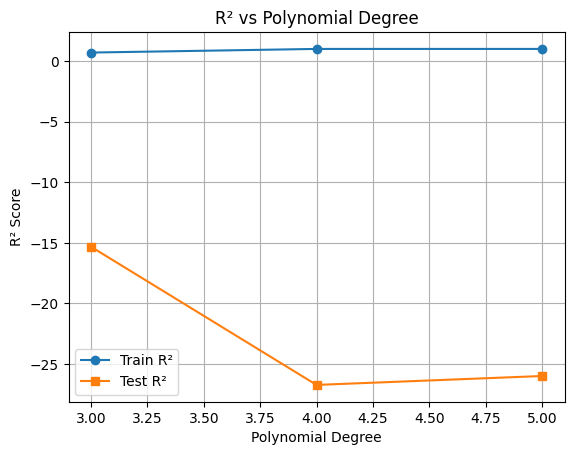

In [48]:
# Plotting R2 vs Polynomial Degree
plt.plot(degrees, polynomial_r2_train_scores, label='Train R²', marker='o')
plt.plot(degrees, polynomial_r2_test_scores, label='Test R²', marker='s')
plt.xlabel("Polynomial Degree")
plt.ylabel("R² Score")
plt.title("R² vs Polynomial Degree")
plt.legend()
plt.grid(True)
plt.show()


In [26]:
# Find the best degree based on the testing R-squared score
best_degree = degrees[np.argmax(polynomial_r2_test_scores)]

print(f"\nPolynomial Linear Regression:")
print(f"Best Degree: {best_degree}")
print(f"Training R-squared Scores: {polynomial_r2_train_scores}")
print(f"Testing R-squared Scores: {polynomial_r2_test_scores}")
print("\n")
print(f"Training Mean Absolute Error Scores: {polynomial_mae_train_scores}")
print(f"Testing Mean Absolute Error Scores: {polynomial_mae_test_scores}")
print("\n")
print(f"Training Mean Squared Error Scores: {polynomial_mse_train_scores}")
print(f"Testing Mean Squared Error Scores: {polynomial_mse_test_scores}")
print("\n")
print(f"Training Root Mean Squared Error Scores: {polynomial_rmse_train_scores}")
print(f"Testing Root Mean Squared Error Scores: {polynomial_rmse_test_scores}")


Polynomial Linear Regression:
Best Degree: 3
Training R-squared Scores: [0.6994711109157647, 1.0, 1.0]
Testing R-squared Scores: [-15.32968017945674, -26.72808338196234, -25.99292008742172]


Training Mean Absolute Error Scores: [33.91784702549575, 8.129655588944258e-12, 8.372649127360573e-12]
Testing Mean Absolute Error Scores: [177.25842696629215, 261.66714358871434, 255.9683575835703]


Training Mean Squared Error Scores: [1826.1331444759207, 1.1310078374181943e-22, 1.2072581267080294e-22]
Testing Mean Squared Error Scores: [86517.12359550562, 146907.59345315787, 143012.58675874228]


Training Root Mean Squared Error Scores: [42.73327912149875, 1.0634885224666011e-11, 1.0987529871213226e-11]
Testing Root Mean Squared Error Scores: [294.1379329421923, 383.2852638090302, 378.17005005518655]


## Regularization

In [27]:
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [34]:
# Regularization strengths (alpha values)
alphas = [0.001, 0.01, 0.1, 1, 10]

In [29]:
# Initialize result storage
ridge_models = []
ridge_r2_train_scores = []
ridge_r2_test_scores = []
ridge_mae_train_scores = []
ridge_mae_test_scores = []
ridge_mse_train_scores = []
ridge_mse_test_scores = []
ridge_rmse_train_scores = []
ridge_rmse_test_scores = []

lasso_models = []
lasso_r2_train_scores = []
lasso_r2_test_scores = []
lasso_mae_train_scores = []
lasso_mae_test_scores = []
lasso_mse_train_scores = []
lasso_mse_test_scores = []
lasso_rmse_train_scores = []
lasso_rmse_test_scores = []

In [43]:
# Fit models and evaluate
for alpha in alphas:
    # Ridge
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly, y_train)
    ridge_models.append(ridge_model)
    
    y_train_pred_ridge = ridge_model.predict(X_train_poly)
    y_test_pred_ridge = ridge_model.predict(X_test_poly)

    ridge_r2_train_scores.append(r2_score(y_train, y_train_pred_ridge))
    ridge_r2_test_scores.append(r2_score(y_test, y_test_pred_ridge))

    ridge_mae_train_scores.append(mean_absolute_error(y_train, y_train_pred_ridge))
    ridge_mae_test_scores.append(mean_absolute_error(y_test, y_test_pred_ridge))

    ridge_mse_train_scores.append(mean_squared_error(y_train, y_train_pred_ridge))
    ridge_mse_test_scores.append(mean_squared_error(y_test, y_test_pred_ridge))

    ridge_rmse_train_scores.append(np.sqrt(mean_squared_error(y_train, y_train_pred_ridge)))
    ridge_rmse_test_scores.append(np.sqrt(mean_squared_error(y_test, y_test_pred_ridge)))

    # Lasso
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_poly, y_train)
    lasso_models.append(lasso_model)
    
    y_train_pred_lasso = lasso_model.predict(X_train_poly)
    y_test_pred_lasso = lasso_model.predict(X_test_poly)

    lasso_r2_train_scores.append(r2_score(y_train, y_train_pred_lasso))
    lasso_r2_test_scores.append(r2_score(y_test, y_test_pred_lasso))

    lasso_mae_train_scores.append(mean_absolute_error(y_train, y_train_pred_lasso))
    lasso_mae_test_scores.append(mean_absolute_error(y_test, y_test_pred_lasso))

    lasso_mse_train_scores.append(mean_squared_error(y_train, y_train_pred_lasso))
    lasso_mse_test_scores.append(mean_squared_error(y_test, y_test_pred_lasso))

    lasso_rmse_train_scores.append(mean_squared_error(y_train, y_train_pred_lasso, squared=False))
    lasso_rmse_test_scores.append(mean_squared_error(y_test, y_test_pred_lasso, squared=False))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.284e+05, tolerance: 2.145e+02
  model = cd_fast.enet_coordinate_descent(


In [45]:
print("Evaluation metrics for Ridge and Lasso Regression:\n")
for i, alpha in enumerate(alphas):
    print(f"\nAlpha = {alpha}")
    print("-" * 40)
    print("Ridge Regression:")
    print(f"  Train R²:   {ridge_r2_train_scores[i]:.4f}")
    print(f"  Test R²:    {ridge_r2_test_scores[i]:.4f}")
    print(f"  Train MAE:  {ridge_mae_train_scores[i]:.4f}")
    print(f"  Test MAE:   {ridge_mae_test_scores[i]:.4f}")
    print(f"  Train MSE:  {ridge_mse_train_scores[i]:.4f}")
    print(f"  Test MSE:   {ridge_mse_test_scores[i]:.4f}")
    print(f"  Train RMSE:{ridge_rmse_train_scores[i]:.4f}")
    print(f"  Test RMSE: {ridge_rmse_test_scores[i]:.4f}")
    
    print("\nLasso Regression:")
    print(f"  Train R²:   {lasso_r2_train_scores[i]:.4f}")
    print(f"  Test R²:    {lasso_r2_test_scores[i]:.4f}")
    print(f"  Train MAE:  {lasso_mae_train_scores[i]:.4f}")
    print(f"  Test MAE:   {lasso_mae_test_scores[i]:.4f}")
    print(f"  Train MSE:  {lasso_mse_train_scores[i]:.4f}")
    print(f"  Test MSE:   {lasso_mse_test_scores[i]:.4f}")
    print(f"  Train RMSE:{lasso_rmse_train_scores[i]:.4f}")
    print(f"  Test RMSE: {lasso_rmse_test_scores[i]:.4f}")

Evaluation metrics for Ridge and Lasso Regression:


Alpha = 0.001
----------------------------------------
Ridge Regression:
  Train R²:   0.5738
  Test R²:    0.5108
  Train MAE:  40.9635
  Test MAE:   39.7388
  Train MSE:  2589.5974
  Test MSE:   2591.8706
  Train RMSE:50.8881
  Test RMSE: 50.9104

Lasso Regression:
  Train R²:   0.5893
  Test R²:    0.5013
  Train MAE:  39.8551
  Test MAE:   39.9869
  Train MSE:  2495.7581
  Test MSE:   2642.1985
  Train RMSE:49.9576
  Test RMSE: 51.4023

Alpha = 0.01
----------------------------------------
Ridge Regression:
  Train R²:   0.5441
  Test R²:    0.4843
  Train MAE:  42.6578
  Test MAE:   41.4621
  Train MSE:  2770.4953
  Test MSE:   2732.2818
  Train RMSE:52.6355
  Test RMSE: 52.2712

Lasso Regression:
  Train R²:   0.5419
  Test R²:    0.4908
  Train MAE:  42.7428
  Test MAE:   41.1249
  Train MSE:  2783.5254
  Test MSE:   2698.0266
  Train RMSE:52.7591
  Test RMSE: 51.9425

Alpha = 0.1
----------------------------------------
Ridge

In [46]:
best_ridge_idx = ridge_r2_test_scores.index(max(ridge_r2_test_scores))
best_lasso_idx = lasso_r2_test_scores.index(max(lasso_r2_test_scores))

best_ridge_model = ridge_models[best_ridge_idx]
best_lasso_model = lasso_models[best_lasso_idx]

y_test_pred_ridge = best_ridge_model.predict(X_test_poly)
y_test_pred_lasso = best_lasso_model.predict(X_test_poly)

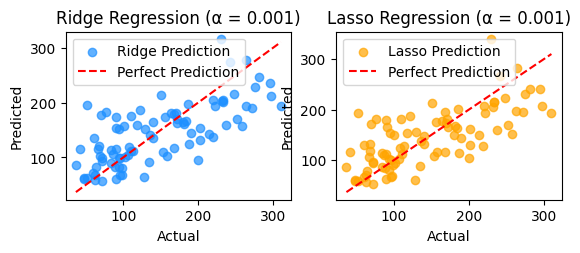

In [47]:
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_test_pred_ridge, color='dodgerblue', alpha=0.7, label='Ridge Prediction')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Ridge Regression (α = {alphas[best_ridge_idx]})")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(y_test, y_test_pred_lasso, color='orange', alpha=0.7, label='Lasso Prediction')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Lasso Regression (α = {alphas[best_lasso_idx]})")
plt.legend()